# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
import pickle

# Data Fetching

In [2]:
A1=np.empty((0,5),dtype='float32')
U1=np.empty((0,7),dtype='float32')
node=['150','149','147','144','142','140','136','61']
mon=['Apr','Mar','Aug','Jun','Jul','Sep','May','Oct']
for j in node:
  for i in mon:
    inp= pd.read_csv('../../../data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[1,2,3,15,16],low_memory=False)
    out= pd.read_csv('../../../data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[5,6,7,8,17,18,19],low_memory=False)
    
    inp=np.array(inp,dtype='float32')
    out=np.array(out,dtype='float32')
    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

print(A1)
print(U1)


[[1.50000e+02 1.90401e+05 7.25000e+02 2.75500e+01 8.03900e+01]
 [1.50000e+02 1.90401e+05 8.25000e+02 2.75600e+01 8.03300e+01]
 [1.50000e+02 1.90401e+05 9.25000e+02 2.75800e+01 8.02400e+01]
 ...
 [6.10000e+01 1.91020e+05 1.94532e+05 2.93700e+01 7.52100e+01]
 [6.10000e+01 1.91020e+05 1.94632e+05 2.93500e+01 7.52700e+01]
 [6.10000e+01 1.91020e+05 1.94732e+05 2.93400e+01 7.53000e+01]]
[[ 28.     3.   -52.   ...  16.97  19.63  20.06]
 [ 28.    15.   -53.   ...  16.63  19.57  23.06]
 [ 31.    16.   -55.   ...  17.24  19.98  20.24]
 ...
 [ 76.    12.   -76.   ...   3.47   3.95   4.35]
 [ 75.    13.   -76.   ...   3.88   4.33   4.42]
 [ 76.    12.   -75.   ...   3.46   4.07   4.28]]


# Min Max Scaler

In [3]:
from sklearn.decomposition import PCA
import warnings
scaler_obj1=PCA()
scaler_obj2=PCA()
X1=scaler_obj1.fit_transform(A1)
Y1=scaler_obj2.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

# Model

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

# Splitting Data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.25,random_state=42)


model6 =MultiOutputRegressor(KNeighborsRegressor(n_neighbors=7,weights='uniform',algorithm='auto',leaf_size=50,p=2))
model_fit6=model6.fit(x_train, y_train)

print('Model Training done!!')

# Dumping Model into a file

filename6 = 'knn.sav'
pickle.dump(model_fit6, open(filename6, 'wb'))

Model Training done!!


# Error Analysis

In [5]:
from sklearn import metrics
from sklearn.metrics import r2_score
train_sizes=['NO2','O3','NO','CO','PM1','PM2.5','PM10']

y_test_pred6=model_fit6.predict(x_test)
y_train_pred6=model_fit6.predict(x_train)

#finding out the r2 score
r2_test6=r2_score(y_test,y_test_pred6,multioutput='variance_weighted')
r2_train6=r2_score(y_train,y_train_pred6,multioutput='variance_weighted')

print('r2 score on train data '+ str(r2_train6))
print('r2 score on test data '+ str(r2_test6))

knn_mae=metrics.mean_absolute_error(y_test, y_test_pred6)
knn_mse=metrics.mean_squared_error(y_test, y_test_pred6)
knn_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred6))
print('Mean Absolute Error:',knn_mae)
print('Mean Squared Error:',knn_mse )
print('Root Mean Squared Error:',knn_rmse)

r2 score on train data 0.16398142375119512
r2 score on test data -259.8298535816029
Mean Absolute Error: 70.218254
Mean Squared Error: 373328160.0
Root Mean Squared Error: 19321.701


In [6]:
import pickle
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.25,random_state=42)
loaded_model_fit7 = pickle.load(open("knn.sav", 'rb'))
y_test_pred=loaded_model_fit7.predict(x_test)
print("Predicted :\n",y_test_pred)
r2_test=r2_score(y_test,y_test_pred,multioutput='variance_weighted')
print("R2 Score : ",r2_test)

Predicted :
 [[-6.5936104e+01  1.9040781e+01 -2.7040766e+01 ... -3.3272068e+01
  -1.0157745e-01  3.3694959e-01]
 [-5.2815472e+01 -3.7109249e+01  9.3694046e+01 ...  4.6864311e+01
   1.9648609e+00 -1.8005075e+00]
 [-7.1098198e+01  1.9677404e+00 -1.2460848e+02 ... -1.7390741e+01
   1.7182257e+00  5.2252021e-02]
 ...
 [-8.9334312e+01 -4.9841280e+00 -1.9604315e+01 ...  1.1679227e+01
  -1.1458350e+00 -3.4089679e-01]
 [-3.9348888e+01  3.6618336e+01  2.5109758e+02 ... -1.9031820e+01
  -1.3820250e+00 -2.7963397e-01]
 [-9.3873352e+01 -2.9328386e+01  3.1168808e+02 ... -1.5406599e+01
   6.9710773e-01  3.4256580e-01]]
R2 Score :  -259.8298535816029


In [7]:
x_test=scaler_obj1.inverse_transform(x_test)
y_test_pred=scaler_obj2.inverse_transform(y_test_pred)
y_test=scaler_obj2.inverse_transform(y_test)
pd.DataFrame(y_test_pred)

,0,1,2,3,4,5,6
0,70.571426,25.285706,-78.142899,410.857147,1.195709,1.508585,2.478561
1,14.285725,38.000034,-24.428564,531.571411,41.670006,47.044270,54.631439
2,53.571426,20.000008,-25.857117,313.285706,8.434283,10.044292,13.889997
3,50.571426,16.857140,-59.571457,444.428589,16.015711,18.504288,19.984283
4,20.857153,47.857170,2.428646,152.857086,7.735715,8.794294,11.568571
...,...,...,...,...,...,...,...
432566,-5.142838,62.285759,31.000130,-58.571503,5.478574,6.365725,6.891428
432567,80.428566,43.142838,-83.428627,384.142853,1.352852,1.711439,1.894276
432568,46.714287,1.714302,-33.571419,418.285736,24.584288,28.315712,29.984289
432569,87.857132,51.999981,-94.714378,689.000000,9.358566,10.122863,10.498564


In [8]:
import datetime
from datetime import datetime
temp_arr=x_test[0:,1]
dates=list()
for i in range(0,len(temp_arr)):
    datetime_str=str(int(temp_arr[i]))
    datetime_str=datetime_str[0:6]
    if(datetime_str[4:6]=="00"):
        datetime_str=datetime_str[0:4]+'1'
    datetime_obj = datetime.strptime(datetime_str,"%y%m%d")
    dates.append(str(datetime_obj.date()))

In [9]:
import pandas as pd
df1=pd.DataFrame(y_test,index=dates,columns=['NO2','O3','NO','CO','PM1','PM2.5','PM10'])
df1.index.name="DATE"
print("Actual Values:")
df1

Actual Values:


,NO2,O3,NO,CO,PM1,PM2.5,PM10
DATE,,,,,,,
2019-06-04,81.999992,35.999981,-79.000076,706.000061,1.999994,2.420012,2.819992
2019-09-26,19.000008,50.000031,-7.999964,478.000000,10.170000,10.950006,12.669997
2019-05-14,58.000000,38.000008,-33.999943,-107.000092,27.400002,31.749990,41.180004
2019-04-18,82.999985,4.999985,-27.000103,1580.000244,39.410004,45.179993,50.160015
2019-08-31,5.000015,54.000038,-3.999901,-170.000153,6.900000,8.250006,9.109994
...,...,...,...,...,...,...,...
2019-03-29,-2.999992,104.000038,64.000160,28.999969,7.130006,7.980010,8.190001
2019-06-30,76.999992,39.999985,-81.000046,413.000000,1.939995,2.610010,4.119987
2019-10-02,21.000006,3.000038,-47.999969,-3.000000,52.910011,61.519974,67.230019


In [10]:
arr=["Y_Actual"]*25
temp_df1=df1.head(25)
temp_df1['Data']=arr
temp_df1.to_excel("knn_y_test.xlsx")
temp_df1

C:\Users\utkar\AppData\Local\Temp/ipykernel_12328/1619810651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df1['Data']=arr


,NO2,O3,NO,CO,PM1,PM2.5,PM10,Data
DATE,,,,,,,,
2019-06-04,81.999992,35.999981,-79.000076,706.000061,1.999994,2.420012,2.819992,Y_Actual
2019-09-26,19.000008,50.000031,-7.999964,478.000000,10.170000,10.950006,12.669997,Y_Actual
2019-05-14,58.000000,38.000008,-33.999943,-107.000092,27.400002,31.749990,41.180004,Y_Actual
2019-04-18,82.999985,4.999985,-27.000103,1580.000244,39.410004,45.179993,50.160015,Y_Actual
2019-08-31,5.000015,54.000038,-3.999901,-170.000153,6.900000,8.250006,9.109994,Y_Actual
2019-06-30,10.000008,34.000034,35.000114,51.999847,6.890001,8.320008,10.110000,Y_Actual
2019-07-27,24.000006,6.000038,-37.999950,-69.000092,18.180000,22.039999,23.079998,Y_Actual
2019-07-08,71.999992,11.999985,-93.000092,649.000000,3.119994,4.330011,6.959993,Y_Actual
2019-09-07,52.000000,66.000000,-73.000031,243.999954,20.639997,23.179996,23.709995,Y_Actual


In [11]:
import pandas as pd
df2=pd.DataFrame(y_test_pred,index=dates,columns=['NO2','O3','NO','CO','PM1','PM2.5','PM10'])
df2.index.name="DATE"
print("Predicted Values:")
df2

Predicted Values:


,NO2,O3,NO,CO,PM1,PM2.5,PM10
DATE,,,,,,,
2019-06-04,70.571426,25.285706,-78.142899,410.857147,1.195709,1.508585,2.478561
2019-09-26,14.285725,38.000034,-24.428564,531.571411,41.670006,47.044270,54.631439
2019-05-14,53.571426,20.000008,-25.857117,313.285706,8.434283,10.044292,13.889997
2019-04-18,50.571426,16.857140,-59.571457,444.428589,16.015711,18.504288,19.984283
2019-08-31,20.857153,47.857170,2.428646,152.857086,7.735715,8.794294,11.568571
...,...,...,...,...,...,...,...
2019-03-29,-5.142838,62.285759,31.000130,-58.571503,5.478574,6.365725,6.891428
2019-06-30,80.428566,43.142838,-83.428627,384.142853,1.352852,1.711439,1.894276
2019-10-02,46.714287,1.714302,-33.571419,418.285736,24.584288,28.315712,29.984289


In [12]:
arr=["Y_Predicted"]*25
temp_df2=df2.head(25)
temp_df2['Data']=arr
temp_df2.to_excel("knn_y_test_pred.xlsx")
temp_df2

C:\Users\utkar\AppData\Local\Temp/ipykernel_12328/2452171575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df2['Data']=arr


,NO2,O3,NO,CO,PM1,PM2.5,PM10,Data
DATE,,,,,,,,
2019-06-04,70.571426,25.285706,-78.142899,410.857147,1.195709,1.508585,2.478561,Y_Predicted
2019-09-26,14.285725,38.000034,-24.428564,531.571411,41.670006,47.044270,54.631439,Y_Predicted
2019-05-14,53.571426,20.000008,-25.857117,313.285706,8.434283,10.044292,13.889997,Y_Predicted
2019-04-18,50.571426,16.857140,-59.571457,444.428589,16.015711,18.504288,19.984283,Y_Predicted
2019-08-31,20.857153,47.857170,2.428646,152.857086,7.735715,8.794294,11.568571,Y_Predicted
2019-06-30,24.428577,42.428600,7.285809,51.857086,5.511429,6.575725,8.378569,Y_Predicted
2019-07-27,40.285717,3.857155,-58.428604,461.428558,17.404284,20.817142,22.487141,Y_Predicted
2019-07-08,74.714279,13.571426,-98.714371,639.000061,4.059994,4.735725,5.159992,Y_Predicted
2019-09-07,29.000008,53.285736,-23.571404,359.571411,44.680008,50.382835,56.244293,Y_Predicted


# y-test vs y-predict

Y_Test: [[ 81.99999    35.99998   -79.00008   ...   1.9999943   2.4200115
    2.819992 ]
 [ 19.000008   50.00003    -7.9999638 ...  10.17       10.950006
   12.669997 ]
 [ 58.         38.000008  -33.999943  ...  27.400002   31.74999
   41.180004 ]
 ...
 [ 21.000006    3.0000381 -47.99997   ...  52.91001    61.519974
   67.23002  ]
 [ 70.99999    39.99999   -87.00007   ...   7.5999937   8.020008
    8.019993 ]
 [ -8.999989   -4.9999237 -15.99999   ...   3.500001    4.2200146
    4.3899956]]
Y_Test_Predict: [[-6.5936104e+01  1.9040781e+01 -2.7040766e+01 ... -3.3272068e+01
  -1.0157745e-01  3.3694959e-01]
 [-5.2815472e+01 -3.7109249e+01  9.3694046e+01 ...  4.6864311e+01
   1.9648609e+00 -1.8005075e+00]
 [-7.1098198e+01  1.9677404e+00 -1.2460848e+02 ... -1.7390741e+01
   1.7182257e+00  5.2252021e-02]
 ...
 [-8.9334312e+01 -4.9841280e+00 -1.9604315e+01 ...  1.1679227e+01
  -1.1458350e+00 -3.4089679e-01]
 [-3.9348888e+01  3.6618336e+01  2.5109758e+02 ... -1.9031820e+01
  -1.3820250e+00 -2.79

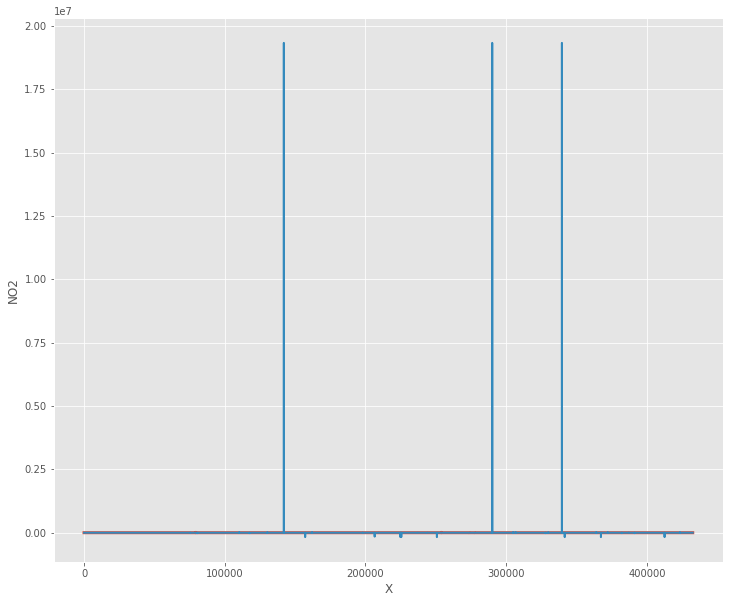

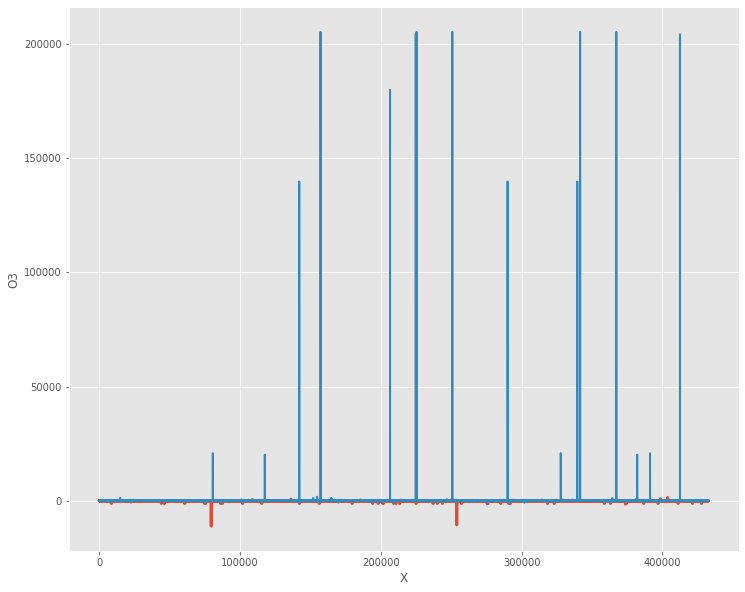

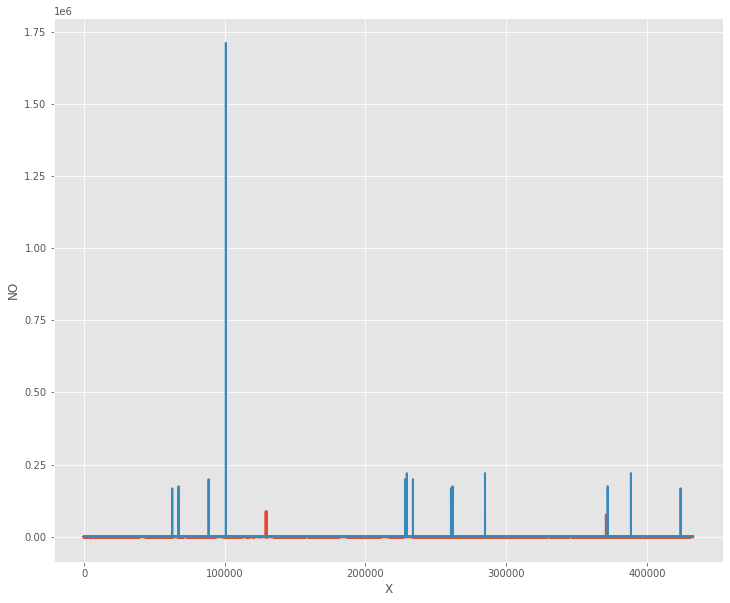

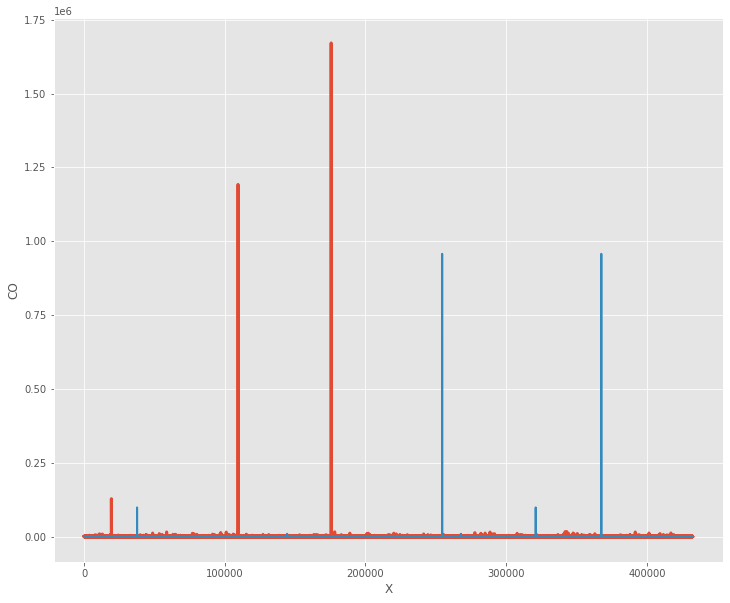

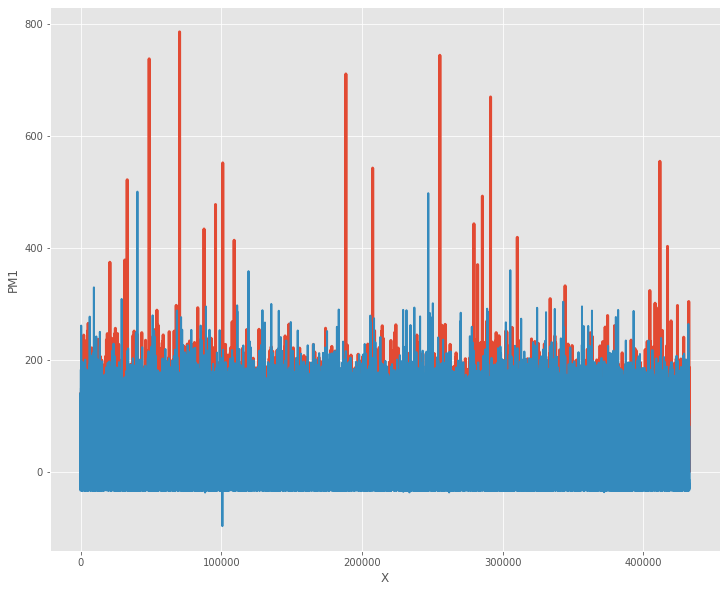

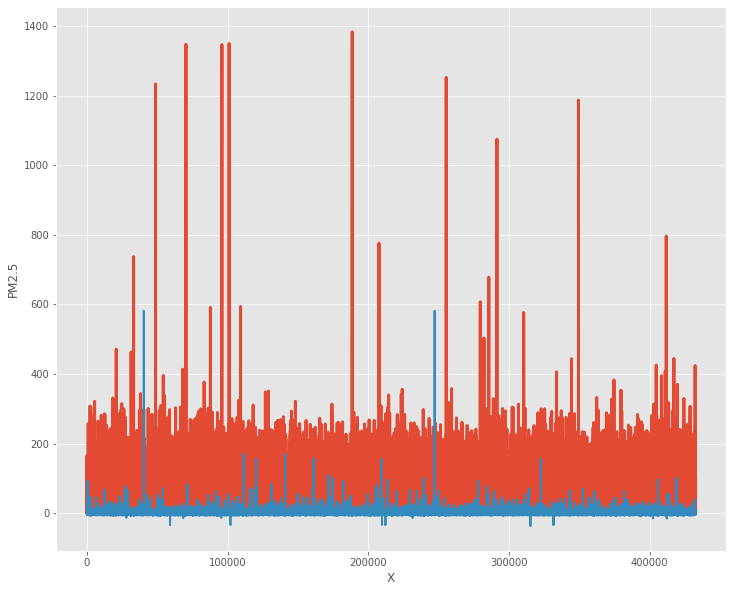

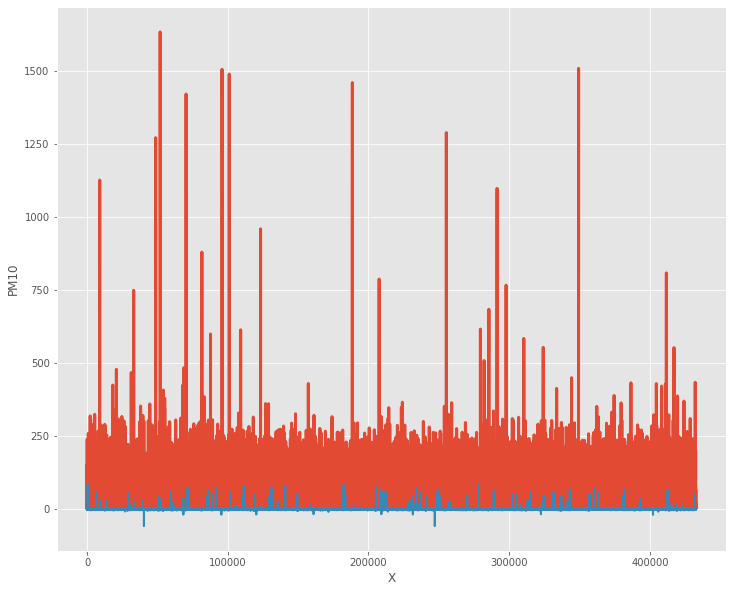

In [13]:
# printing y_test and y_test_predict
print("Y_Test:",y_test)
print("Y_Test_Predict:",y_test_pred6)

from matplotlib import style
style.use('ggplot')

for i in range(0,7):
  plt.figure(figsize=[12,10])
  plt.plot(y_test[:,i],linewidth=3, markersize=12)
  plt.plot(y_test_pred6[:,i],linewidth=2, markersize=12)
  plt.xlabel('X')
  plt.ylabel(train_sizes[i])
  plt.show()